# Data Visualization Part 1

In [ ]:
# Adding the neccecary imports to our code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydot # conda install pydot
import time
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import math


In [ ]:
#type of data:
url_Les_Miserables_network  = '/content/LesMiserables.dot'
url_Rome_graph  = '../data/rome.dot'
url_Jazz_Network  = '../data/JazzNetwork.dot'
url_Small_Directed_Network  = '../data/noname.dot'
url_Pro_League_Network  = '../data/LeagueNetwork.dot'
url_Argumentation_network  = '../data/devonshiredebate_withclusters.dot'
url_Argumentation_network_for_part_five = '../data/devonshiredebate_withonlytwoclusters.dot'
url_Political_blogosphere_network  = '../data/polblogs.dot'

In [ ]:
# classes
class Vertex:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x
        self.y = y
        self.neighbors = []
    def add_neighbor(self,neighbor):
        self.neighbors.append(neighbor)
class Edge:
    def __init__(self, start, end):
        self.start = start
        self.end = end

class Graph:
    def __init__(self):
        self.vertices = []
        self.edges = []

    def add_vertex(self, vertex):
        self.vertices.append(vertex)

    def add_edge(self, edge):
        self.edges.append(edge)

    def get_vertex(self, id):
        for vertex in self.vertices:
            if vertex.id == id:
                return vertex
        return None
    def visualize_graph(self,custom_figsize,radius): # O(V + V + E) = O(2V + E) = O(V + E)
        self.place_vertices_in_circle(radius) # O(V)
        fig, ax = plt.subplots(figsize=(custom_figsize, custom_figsize))  # Adjust width and height as needed
        # Plot Vertices
        scaling_factor = 1 / len(self.vertices)
        for vertex in self.vertices: # O(V)
            ax.scatter(vertex.x, vertex.y, color='blue', zorder=2, s= scaling_factor* 40000*(custom_figsize/15), edgecolors='black')
            ax.text(vertex.x, vertex.y, str(vertex.id), fontsize= (scaling_factor* 40000*(custom_figsize/15))/100, ha='center', va='center', zorder=len(self.vertices) * scaling_factor * 2, color='white')
        # Plot edges
        for edge in self.edges: #O(E)
            start = edge.start
            end = edge.end
            ax.plot([start.x, end.x], [start.y, end.y], color='gray', zorder=1, linewidth=0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Graph Visualization')
        ax.grid(True)
        plt.show()
    def visualize_graph_Bonus(self,custom_figsize,radius): # O(V + V + E) = O(2V + E) = O(V + E)
        avg_nghb=0
        #compute average neighbors
        for vertex in self.vertices:
          avg_nghb+= len(vertex.neighbors)
        avg_nghb= avg_nghb/len(self.vertices)
        print("avg neighbors",avg_nghb)
        #---
        self.place_vertices_in_circle_Bonus(radius,avg_nghb) # O(V)
        fig, ax = plt.subplots(figsize=(custom_figsize, custom_figsize))  # Adjust width and height as needed
        # Plot Vertices
   # Plot Vertices
        scaling_factor = 1 / len(self.vertices)
        for vertex in self.vertices: # O(V)

            ax.scatter(vertex.x, vertex.y, color='blue', zorder=2, s= scaling_factor* 40000*(custom_figsize/15), edgecolors='black')
            ax.text(vertex.x, vertex.y, str(vertex.id), fontsize= (scaling_factor* 40000*(custom_figsize/15))/100, ha='center', va='center', zorder=len(self.vertices) * scaling_factor * 2, color='white')
        # Plot edges
        for edge in self.edges: #O(E)
            start = edge.start
            end = edge.end
            ax.plot([start.x, end.x], [start.y, end.y], color='gray', zorder=1, linewidth=0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Graph Visualization')
        ax.grid(True)
       # ax.set_aspect('equal', adjustable='box')
        plt.show()

    def place_vertices_in_circle(self,radius): # O(V)
        num_vertices = len(self.vertices)
        radius = radius  # Radius of the circle
        center_x = 0
        center_y = 0
        angle_increment = 4 * np.pi / num_vertices

        # Place vertices in a bit of randomized circle
        for i, vertex in enumerate(self.vertices): # O(V)
            angle = i * angle_increment
            vertex.x = center_x + radius * np.cos(angle)
            vertex.y = center_y + radius * np.sin(angle)
    def place_vertices_in_circle_Bonus(self,radius,avg_nghb): # O(V)

        num_vertices = len(self.vertices)
        radius = radius  # Radius of the circle
        given_radius = radius
        center_x = 0
        center_y = 0
        angle_increment = 4 * np.pi / num_vertices

        # Place vertices in a bit of randomized circle
        for i, vertex in enumerate(self.vertices): # O(V)
            radius = given_radius
            if len(vertex.neighbors) > avg_nghb/3 and  len(vertex.neighbors) <= avg_nghb :
                radius=radius-0.2*radius
            if len(vertex.neighbors) > avg_nghb :
                radius=radius-0.4*radius
            angle = i * angle_increment
            vertex.x = center_x + radius * np.cos(angle)
            vertex.y = center_y + radius * np.sin(angle)

In [ ]:
def create_custom_graph(G): # O(V) + O(E) + O(V) + O(E) = O(2V + 2E) = O(V + E)
    # Parsing the vertices and edges from the generated graph into lists
    vertices = [n.get_name() for n in G.get_node_list()] # O(V)
    edges = [(edge.get_source(),edge.get_destination(),edge.get_weight()) for edge in G.get_edge_list()] # O(E)
    graph = Graph()
    for vertex in vertices: # O(V)
        vertex = Vertex(vertex, 0, 0)  # Initialize the vertex with ID and default coordinates
        graph.add_vertex(vertex)
    for edge in edges: # O(E)
        source_vertex = graph.get_vertex(edge[0])
        neighbor_vertex = graph.get_vertex(edge[1])
        if source_vertex is None:
            source_vertex = Vertex(edge[0], 0, 0)
        if neighbor_vertex is None:
            neighbor_vertex = Vertex(edge[1], 0, 0)
        source_vertex.add_neighbor(neighbor_vertex)
        graph.add_edge(Edge(source_vertex, neighbor_vertex))
    return graph

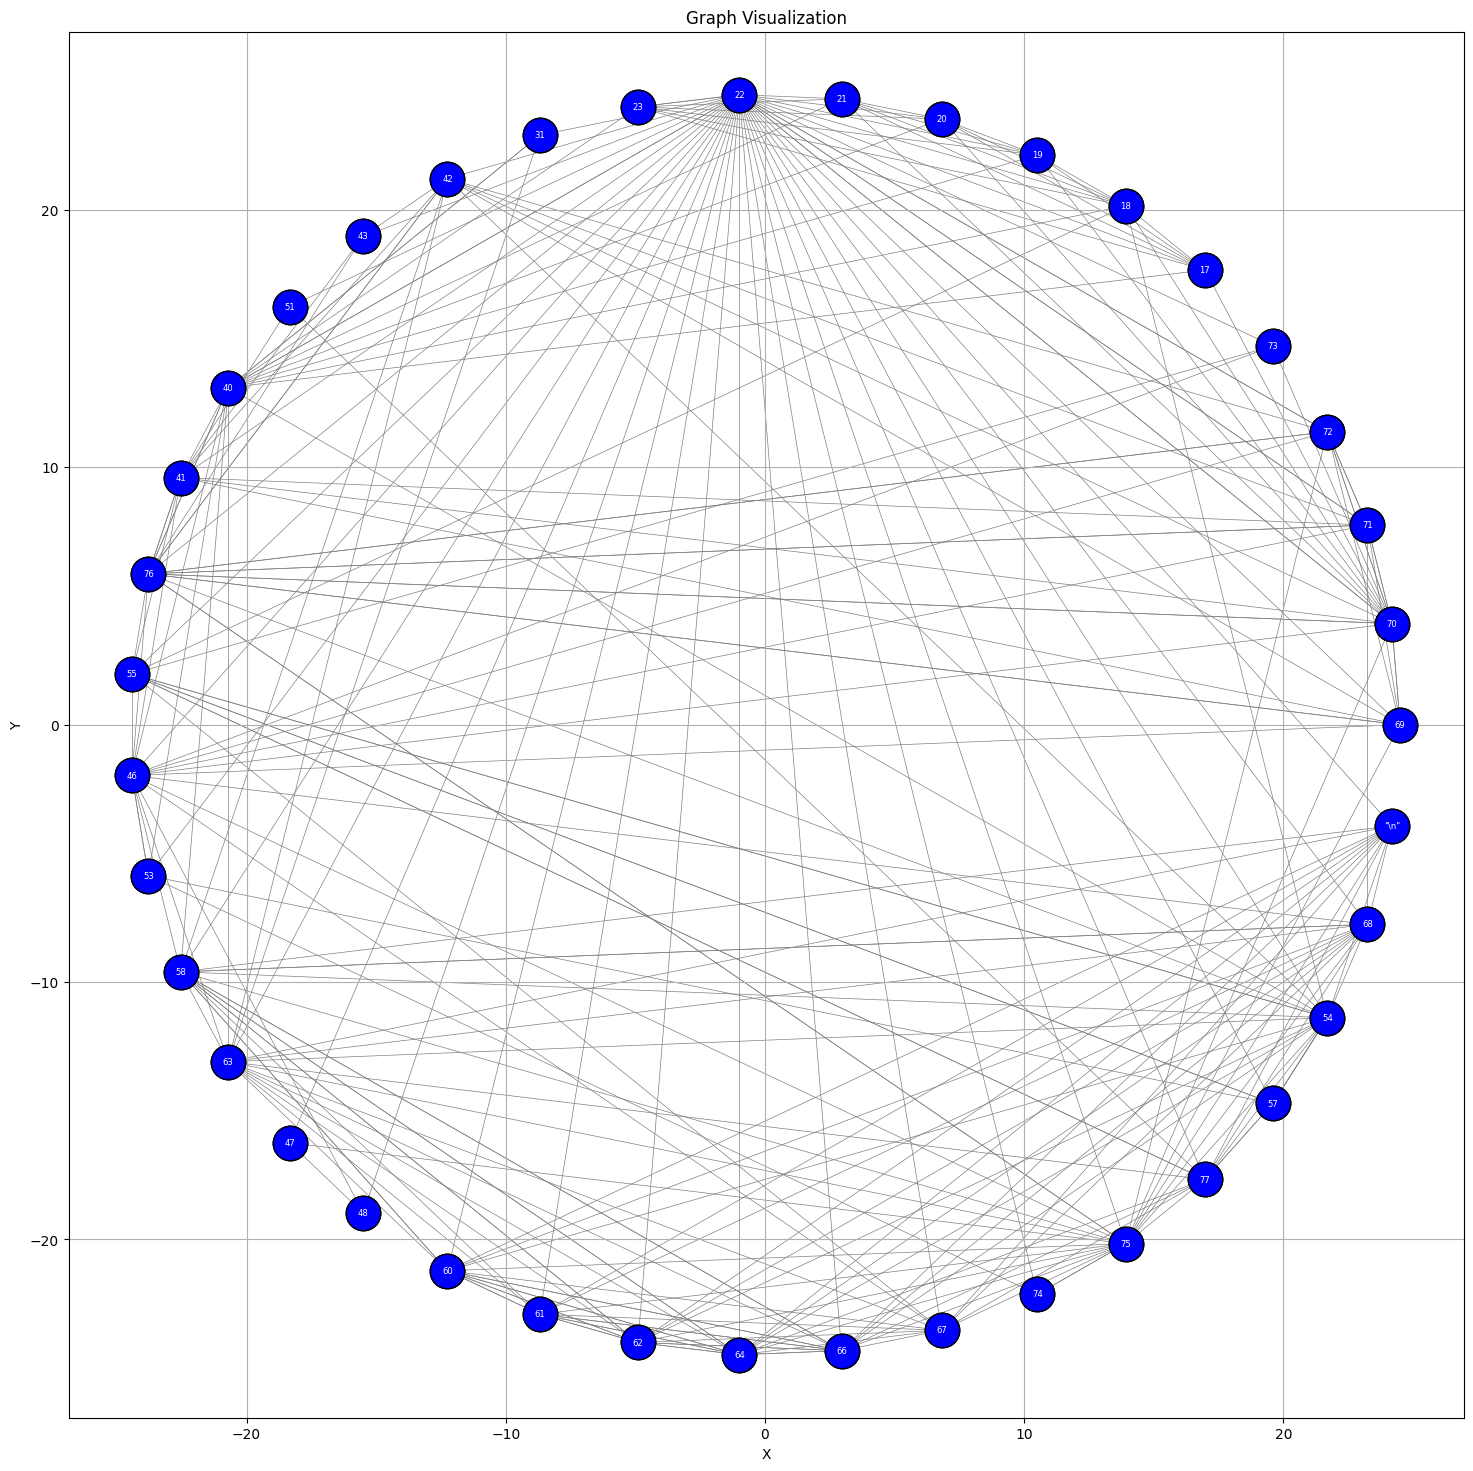

In [ ]:
# Parsing the data from the dot file:
G = pydot.graph_from_dot_file(url_Les_Miserables_network)[0]
#Convering the graph into our custom graph
graph = create_custom_graph(G) #O(V) + O(E) = O(V + E)
# Visualize the graph
fig_size=5+len(graph.vertices)/6 # new line
radius=5+len(graph.vertices)/4 # new line
graph.visualize_graph(fig_size,radius) #O(V + E)

In [ ]:
# Run Bonus part


start_time = time.time()
# Parsing the data from the dot file:
G = pydot.graph_from_dot_file(url_Jazz_Network)[0]
#Convering the graph into our custom graph
graph = create_custom_graph(G) #O(V) + O(E) = O(V + E)
# Visualize the graph
fig_size=5+len(graph.vertices)/6 # new line
radius=5+len(graph.vertices)/4 # new line
graph.visualize_graph_Bonus(fig_size,radius) #O(V + E) #O(V + E)

end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

FileNotFoundError: [Errno 2] No such file or directory: '../data/JazzNetwork.dot'

# Complexity of our layout algorithm:
First, we converted the dot file into a graph representation. In order to work effectively with this graph, we designed a custom structure that is more sutable for our requirements, by using the function "create_custom_graph" that takes the generated graph and convert it into our graph.
Subsequently, our algorithm proceeds as follows:
We iterate through all vertices of the graph and plot them in a circular format. This process has time complexity of $O(V)$.
Next, we scan through the edges of the graph. For each edge, we draw a line between the corresponding pair of vertices. This step has time complexity of $O(E)$ since it involves iterating over all edges.

Therefore, the total **time complexity** of our layout algorithm is **$O(V + E)$**, where V represents the number of vertices and E represents the number of edges in the graph.

In addition, the **space complexity** is **$ O(V^2 + E) $**:
* The class "Edge" is $O(1)$, because it only contains simple variables.
* The class "Vertex" is $O(V)$, because it contains a list of vertices,where in the worst case can contain as much vertices as the total
  vertices - 1. Which is $O(V)$, where V denotes the number of vertices in the graph.
* The class "Graph" is $ O(V^2 + E) $ because we have 2 lists, the first list contains all the vertices ( = $ O(V*V) = O(V^2) $ ) and the second list contains all the edges ( =$O(E)$) , therefore, the total space complexity is $ O(V^2 + E) $, where V represents the number of vertices and E represents the number of edges in the graph.

The total space complexity is $ O(V^2 + E + V + E) = O(V^2 + E) $

# Pro's and Con's
### Pro's:
* Our algorithm performs well in small and medium size datasets (e.g. noname.dot, LeagueNetwork.dot), by visualizing the graph in a circular structure.
* Our algorithm has less overlapping vertices (e.g JazzNetwork.dot), we achieved that by making the distance between the vertices equal, with respect to the overall number of vertices.
* Our algorithm is very fast and efficient, with time complexity of **$O(V+E)$** and space complexity of **$O(V^2+E)$**

### Con's
* Our algorithm has a problem with large datasets visualization (e.g. polblogs.dot), due to the fact that large datasets contains a lot of vertices and edges which makes the graph unreadable.
*
Our algorithm struggles to represent long strings in an understandable way. For example, the graph from polblogs.dot has words instead of numbers as the ID of each vertex. To address this, we need to adjust the shape and size of the vertices accordingly, which leads to overlapping between the vertices.

Unfortunately, our algorithm cannot handle the visualization and management of those cons in a readable and clean way.




# Bonus Part

In this part we took the original layout of the vertex placement and adjust it in order to make an improved visualized graph with clearer and more informative results, Espacially for large datasets (e.g. JazzNetwork.dot). We've done so by adding layers into the calculation of the vertices' location to the original graph. Each layer contains vertices with a range of neighbors. The outer layer includes vertices with number of vertices equal or fewer than the average number of neighbors divided by 3, the middle layer contains all the vertices with number of neighbors beween the average number of neighbors and the average number of neighbors divided by 3, and the inner layer includes all remaining vertices. We've done so, because in our original layout (where all of the vertices are on the same layer = in the same distance from the center(0,0)) we couldn't (or it was very hard) to distinguish between the nodes that has fewer neighbors than the ones that has more neighbors. We acomplished this by creating new function called "place_vertices_in_circle_Bonus" that in addition to placing the nodes into a circular shape also dividing them into the layers (as explained above). In that function we added few "if" statemenst that helped us seperate the nodes by neighbors with changing the radius (the distance from the center (0,0) according to the corresponding layer(as explained above).

As a result of changing the positions of the vertices (with the new function called "place_vertices_in_circle_Bonus") we got a better visualization than just using the original algorithm.
The new algorithm differ from the original algorithm by additional "if" statements that all of them are $O(1)$ (we are just assining new value to a variable), therefore the time complexity did not change and stayed $O(V)$ where V denotes the number of vertices in the graph.

The running time for the the bonus part on the JazzNetwork.dot file is 19.623712301254272 seconds

Additionally, in order to visualize the graph in this part we needed to calculate additional things(the average neighbors and the running time), we still need to iterate through all of the vertices and edges, as in the original algorithm. The **time complexity** remains **$O(V + E)$** where V denotes the vertices and E denotes the edges in the graph. Although we created a new visualization function for the bonus part called "visualize_graph_Bonus", which involves computing the average and running time, we added one more loop with a time complexity of $O(V)$.
However, since it is not nested within the other loops, its time complexity is $O(V+V+V+E) = O(3V+E) = O(V+E)$.

We didn't change any of our data structures therefore the **space complexity** didn't change either and stayed **$O( V^2 + E )$**.


# PART 2

# BFS

In [ ]:

class node_for_BFS:
    def __init__(self, id):
        self.id = id
        self.color = 0 # 0 = white(not visited) | 1 = gray (visited & inside the queue) | 2 = black (visited & outside the queue)
        self.distance = float('inf')
        self.parent = None


In [ ]:
def BFS(graph,root):
    #initializing the table for generating the graph
    tree_table = {}
    for vertex in graph.vertices:
        tree_table[vertex.id] = node_for_BFS(vertex.id)
    #initializing the queue for the visited vertices
    visited_vertices = []
    #Adjusting the root node
    visited_vertices.append(root)
    tree_table[root.id].color = 1
    tree_table[root.id].distance = 0

    while (visited_vertices != []):
        current_vertex = visited_vertices.pop(0)
        tree_table[current_vertex.id].color = 2
        for v in current_vertex.neighbors:
            if tree_table[v.id].color == 0:
                visited_vertices.append(v)
        for v in current_vertex.neighbors:
            if tree_table[v.id].color == 0:
                tree_table[v.id].color = 1
                tree_table[v.id].distance = (tree_table[current_vertex.id].distance + 1)
                tree_table[v.id].parent = current_vertex.id

    return tree_table



In [ ]:
tree_table = BFS(graph,graph.get_vertex('11'))
data = []
for key, obj in tree_table.items():
    data.append(vars(obj))  # Convert object attributes to dictionary
df = pd.DataFrame(data).sort_values(by='distance')
print(df)

      id  color  distance parent
10    11      2       0.0   None
24    33      2       1.0     11
25    34      2       1.0     11
26    35      2       1.0     11
27    36      2       1.0     11
..   ...    ...       ...    ...
3      4      0       inf   None
2      3      0       inf   None
1      2      0       inf   None
9     10      0       inf   None
77  "\n"      0       inf   None

[78 rows x 4 columns]


# DFS

In [ ]:
class node_for_DFS:
    def __init__(self,id):
        self.id = id
        self.b = 0
        self.f = 0
        self.color = 0
        self.parent = None
class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return len(self.items) == 0

    def push(self, item):
        self.items.append(item)

    def pop(self):
        if not self.is_empty():
            return self.items.pop()
        else:
            return None
    def top(self):
        return self.items[-1]


In [ ]:
def DFS(graph,root):
    finished_node_count = 0
    vertices_stack = Stack()
    tree_table = {}
    n = len(graph.vertices)
    for vertex in graph.vertices:
        tree_table[vertex.id] = node_for_DFS(vertex.id)
    vertices_stack.push(root)
    tree_table[root.id].color=1
    tree_table[root.id].b= 1
    tree = DFS_recursive(graph,vertices_stack,n,0,tree_table,2)
    return tree
def DFS_recursive(graph,vertices_stack,n,finished_node_count,tree_table,time_stamp):
    if finished_node_count == n:
        return tree_table
    if not vertices_stack.is_empty():
        current_vertex = vertices_stack.top()
        for v in current_vertex.neighbors:
            if tree_table[v.id].color != 0:
                continue
            else:
                vertices_stack.push(v)
                tree_table[v.id].color = 1
                tree_table[v.id].b = time_stamp
                tree_table[v.id].parent = current_vertex.id
                time_stamp +=1
                return DFS_recursive(graph,vertices_stack,n,finished_node_count,tree_table,time_stamp)
        #all the neighbors has different color than 0
        while not vertices_stack.is_empty():
            current_vertex=vertices_stack.pop()
            tree_table[current_vertex.id].color = 2
            tree_table[current_vertex.id].f = time_stamp
            return DFS_recursive(graph,vertices_stack,n,finished_node_count + 1,tree_table,time_stamp+1)
    else:
        remain_unvisited_node = [graph.get_vertex(vertex.id) for vertex in tree_table.values() if vertex.color != 2]
        if remain_unvisited_node != []:
            vertices_stack.push(remain_unvisited_node[0])
            tree_table[remain_unvisited_node[0].id].color = 1
            tree_table[remain_unvisited_node[0].id].b = time_stamp
            return DFS_recursive(graph,vertices_stack,n,finished_node_count,tree_table,time_stamp+1)





In [ ]:
tree_table2 = DFS(graph,graph.get_vertex("11"))
data = []
for key, obj in tree_table2.items():
    data.append(vars(obj))  # Convert object attributes to dictionary
df = pd.DataFrame(data).sort_values(by='b')
print(df)

      id    b    f  color parent
10    11    1  134      2   None
11    12    2    3      2     11
12    13    4  125      2     11
16    24    5  124      2     13
44    17    6   19      2     24
..   ...  ...  ...    ...    ...
6      7  145  146      2      2
7      8  147  148      2      2
8      9  149  150      2      2
9     10  151  152      2      2
77  "\n"  155  156      2   None

[78 rows x 5 columns]


In [ ]:
import math
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value, parent=None):
        self.value = value
        self.children = []
        self.parent = parent
        self.point = None

def radial_positions(rooted_tree, vertex, alfa, beta, output_graph): #O(V)
    if vertex.parent is None:
        vertex.point = (0, 0)
        output_graph.append(RadialPoint(vertex, (0, 0), None))
    depth_of_vertex = get_depth(vertex)
    theta = alfa
    radius = 50 + (50 * depth_of_vertex)

    leaves_number = subTree_node_count(vertex)
    for child in vertex.children:
        lambda_val = subTree_node_count(child)

        mi = theta + (lambda_val / leaves_number * (beta - alfa))

        x = radius * math.cos((theta + mi) / 2.0)
        y = radius * math.sin((theta + mi) / 2.0)

        child.point = (x, y)

        output_graph.append(RadialPoint(child, (x, y), vertex.point))

        if child.children:
            radial_positions(rooted_tree, child, theta, mi, output_graph)
        theta = mi

def get_depth(node): #O(V)
    depth = 0
    while node.parent:
        depth += 1
        node = node.parent
    return depth

def subTree_node_count(root): # O(V)
    queue = [root]
    count = 0
    while queue:
        current = queue.pop(0)
        count += 1
        for child in current.children:
            queue.append(child)
    return count

class RadialPoint:
    def __init__(self, node, point, parent_point):
        self.node = node
        self.point = point
        self.parent_point = parent_point


def convert_to_tree(node_dict):# O(V)
    node_map = {}  # Map node IDs to TreeNode instances
    root = None

    # Step 1: Create TreeNode instances for each NodeForBFS
    for _, node in node_dict.items():
        if node.color != 2:
            continue
        node_map[node.id] = TreeNode(node.id)
    # Step 2: Link TreeNode instances based on parent-child relationships
    for _, node in node_dict.items():
        if node.color != 2:
            continue
        parent_id = node.parent
        if parent_id is not None:
            node_map[node.id].parent = node_map[parent_id]
            node_map[parent_id].children.append(node_map[node.id])
        else:
            # If a node has no parent, it's the root of the tree
            root = node_map[node.id]
    return root

def compute_depth(root): #O(V)
    if not root.children:
        return 1
    return 1 + max(compute_depth(child) for child in root.children)

def visualize_radial_layout(ax,table,title):  #O(V + E + V + V) =
    root_node = convert_to_tree(table)
    output_graph = []
    radial_positions(root_node, root_node, 0, math.pi * 2, output_graph)

# Visualize the tree with circles representing layers
    for point in output_graph:
        x, y = point.point
        px, py = point.parent_point or (0, 0)  # Parent point or (0, 0) if root
        ax.plot([px, x], [py, y], 'k-')  # Draw edge
        ax.plot(x, y, 'bo')  # Draw node
        ax.text(x, y, point.node.value, fontsize=12, ha='center', va='bottom',color="green")

    # Draw circles representing layers
    num_layers = compute_depth(root_node) -1  # Number of layers
    max_radius = 50*num_layers

    layer_radii = [max_radius * (i + 1) / num_layers for i in range(num_layers)]
    for r in layer_radii:
        circle = plt.Circle((0, 0), r, color='gray', fill=False)
        ax.add_patch(circle)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(title,fontsize=30)
    ax.axis('off')



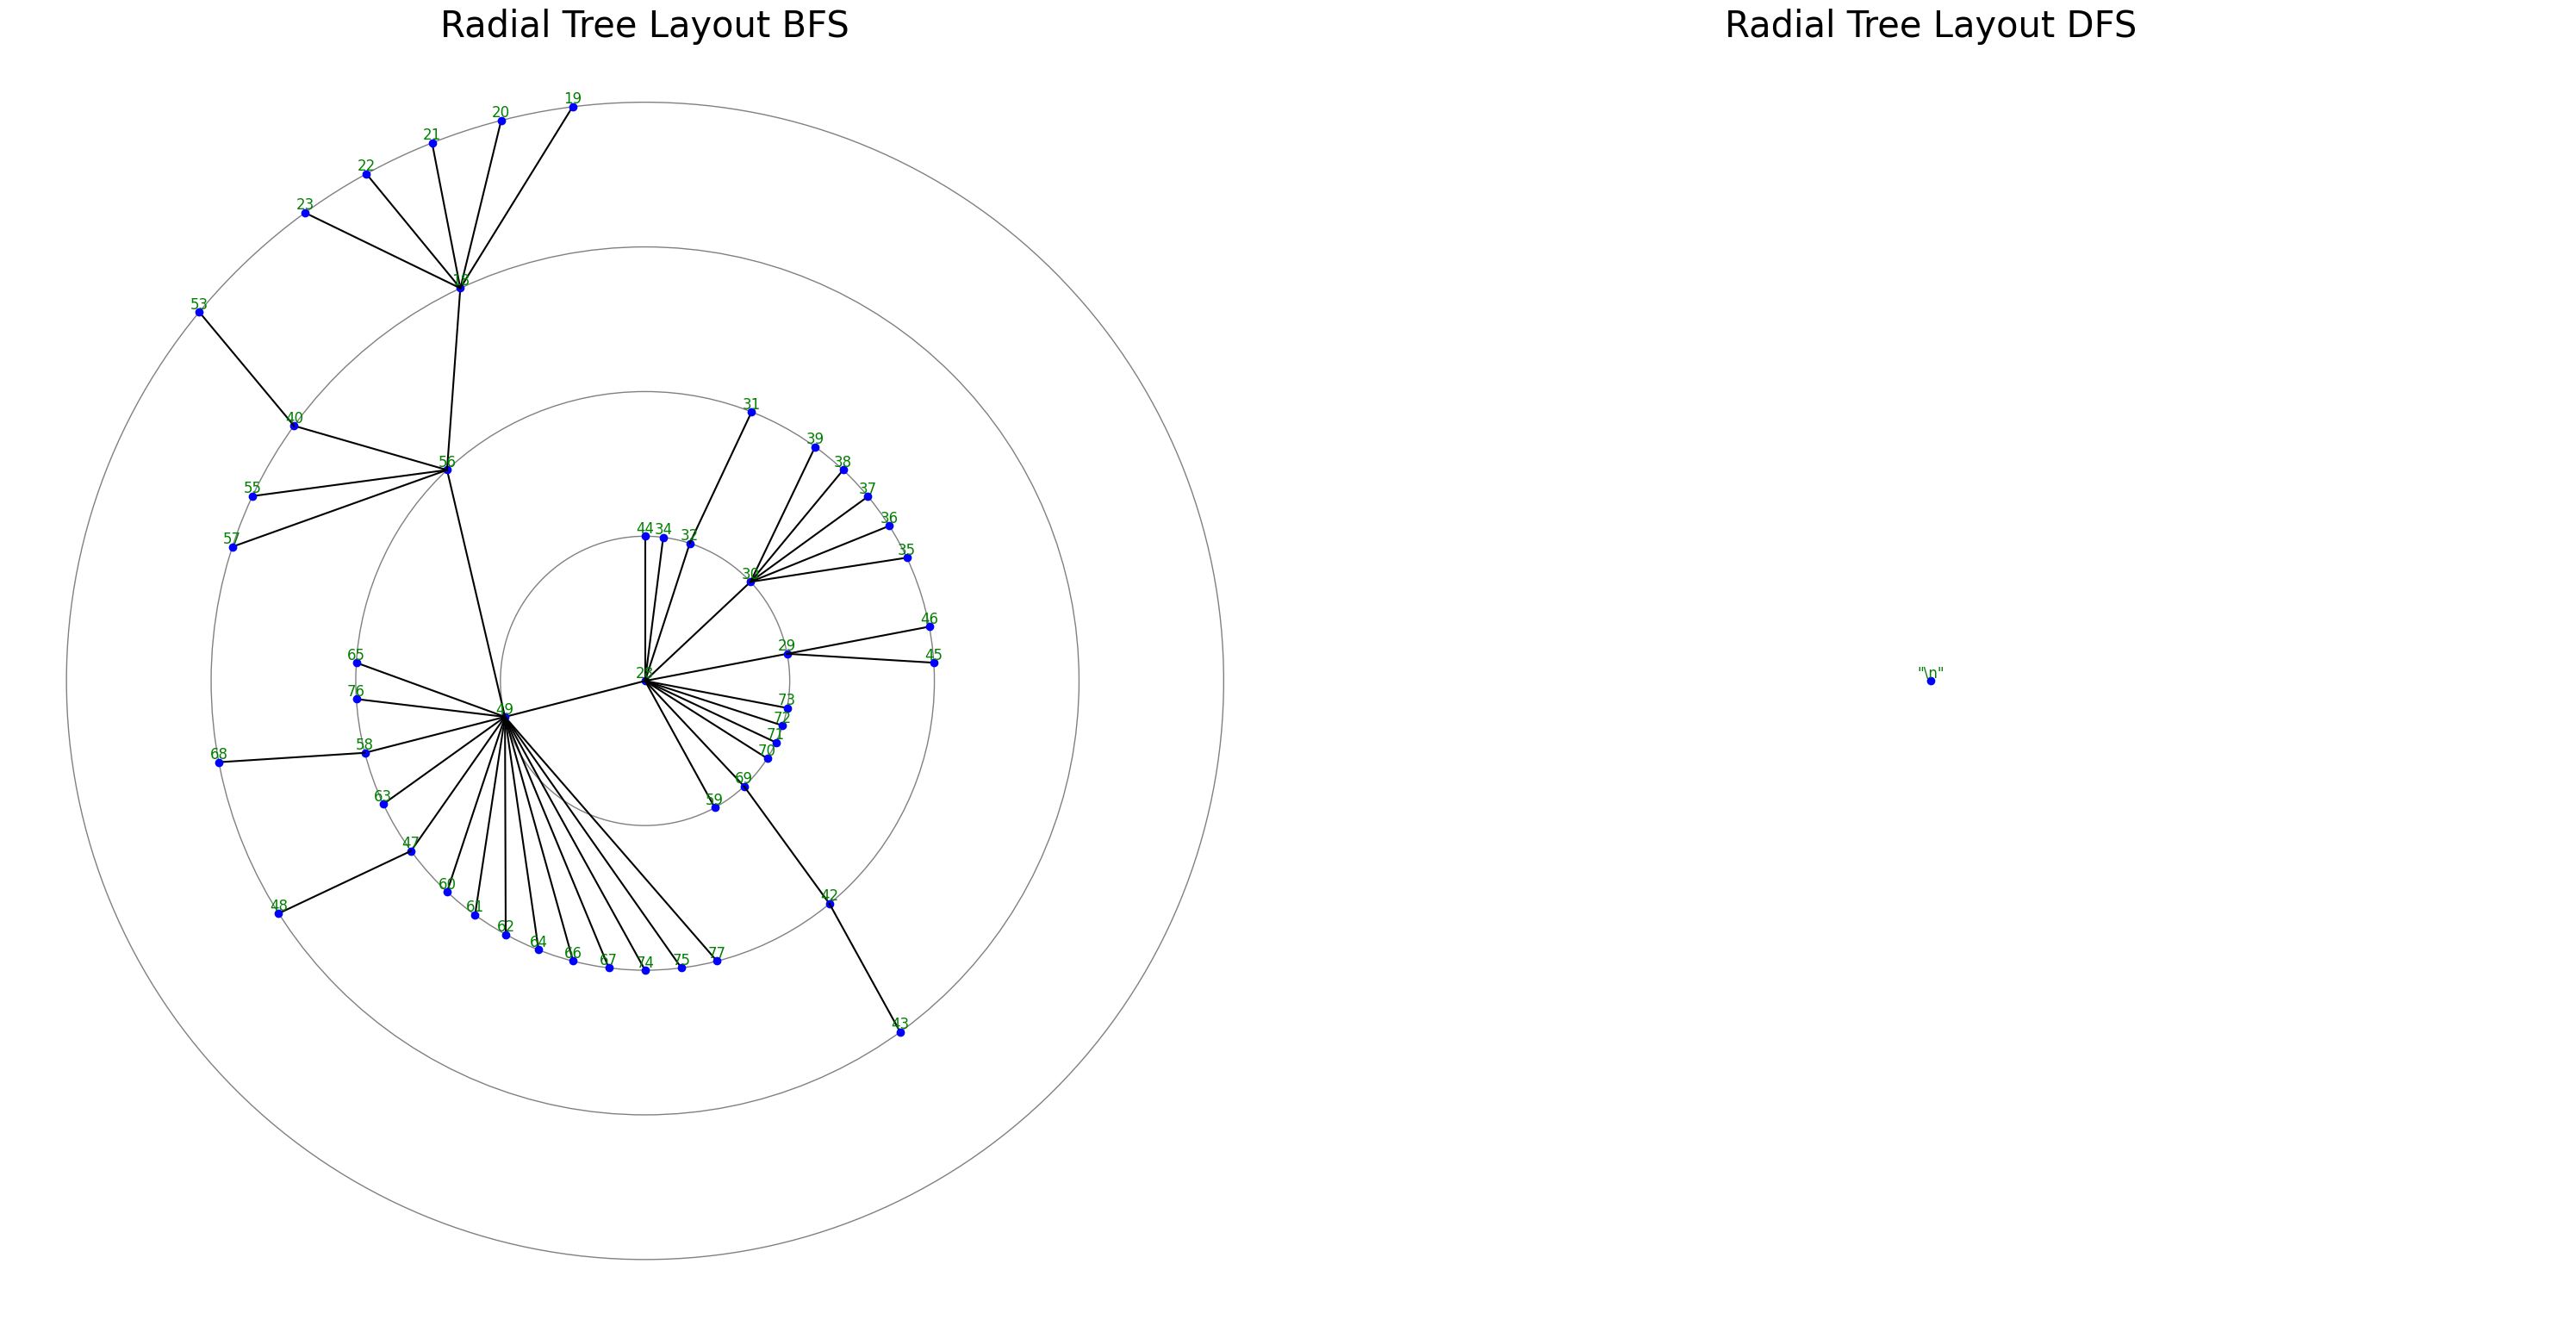

In [ ]:
G=pydot.graph_from_dot_file(url_Les_Miserables_network)[0]
graph = create_custom_graph(G)

BFS_table = BFS(graph,graph.get_vertex("28"))
DFS_table = DFS(graph,graph.get_vertex("28"))

fig,axs = plt.subplots(1,2,figsize=(30,30))
visualize_radial_layout(axs[0],BFS_table,'Radial Tree Layout BFS')
visualize_radial_layout(axs[1],DFS_table,'Radial Tree Layout DFS')
plt.tight_layout()
plt.show()

In [ ]:
G=pydot.graph_from_dot_file(url_Jazz_Network)[0]
graph = create_custom_graph(G)

BFS_table = BFS(graph,graph.get_vertex("28"))
DFS_table = DFS(graph,graph.get_vertex("28"))

fig,axs = plt.subplots(1,2,figsize=(30,30))
visualize_radial_layout(axs[0],BFS_table,'Radial Tree Layout BFS')
visualize_radial_layout(axs[1],DFS_table,'Radial Tree Layout DFS')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/JazzNetwork.dot'

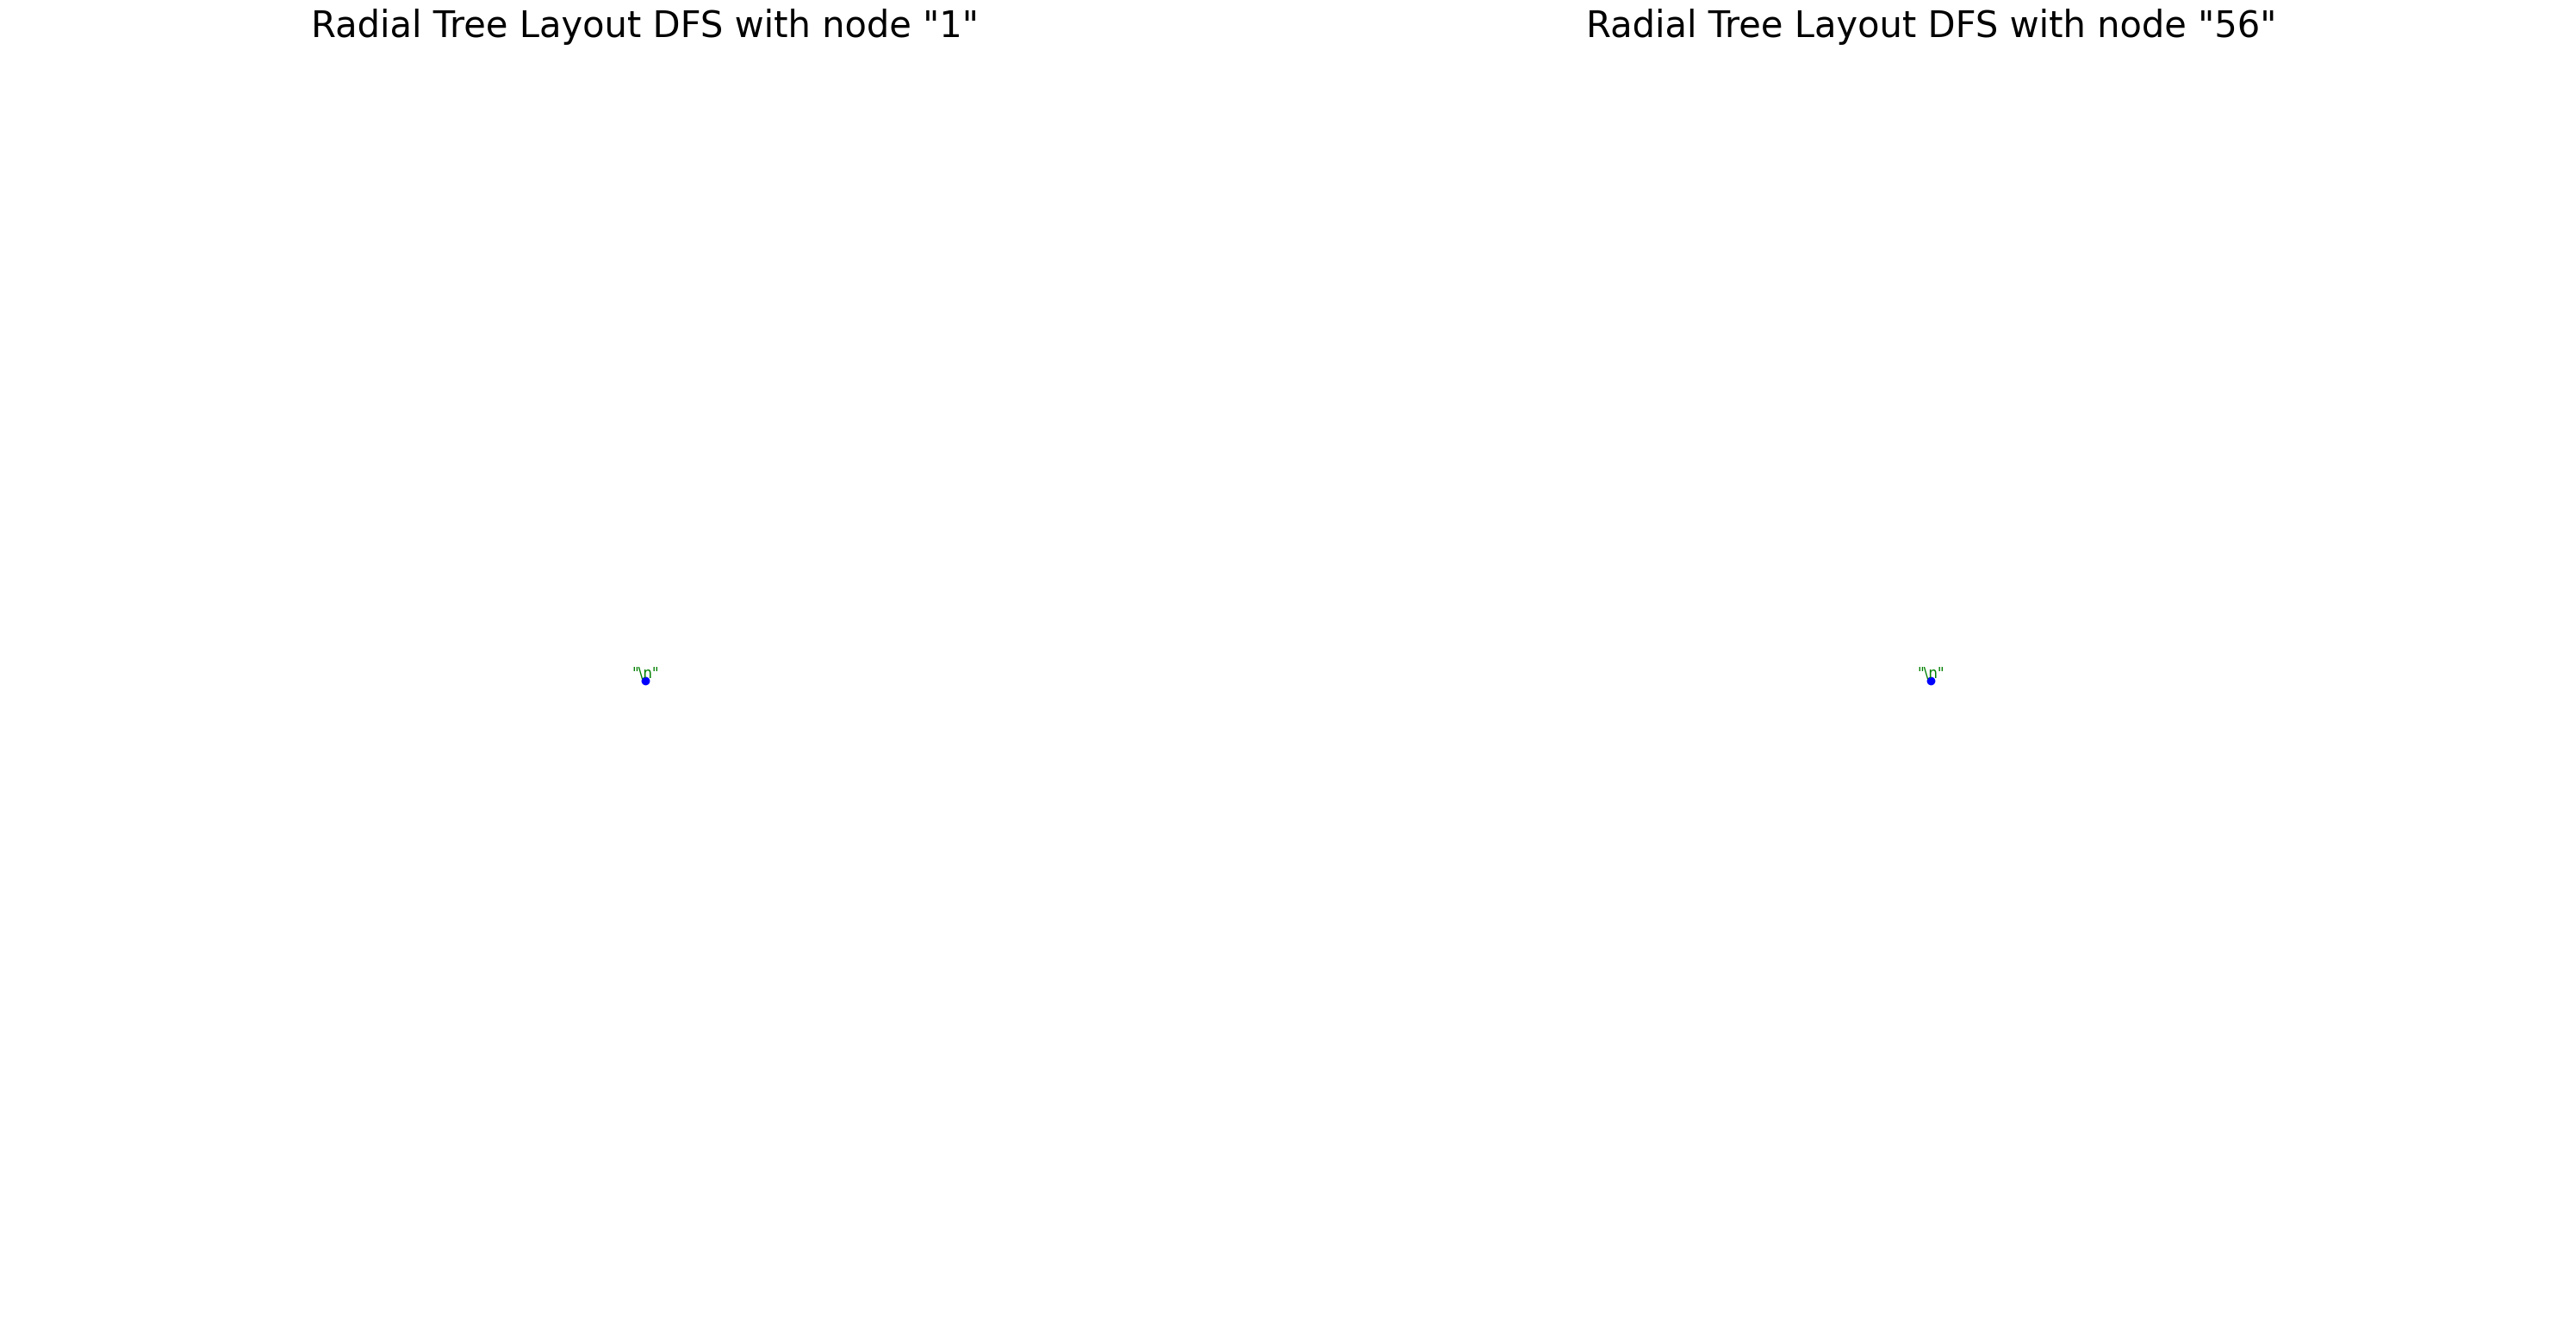

In [ ]:
G=pydot.graph_from_dot_file(url_Les_Miserables_network)[0]
graph = create_custom_graph(G)

BFS_table = DFS(graph,graph.get_vertex("1"))
DFS_table = DFS(graph,graph.get_vertex("56"))

fig,axs = plt.subplots(1,2,figsize=(30,30))
visualize_radial_layout(axs[0],BFS_table,'Radial Tree Layout DFS with node "1"')
visualize_radial_layout(axs[1],DFS_table,'Radial Tree Layout DFS with node "56"')
plt.tight_layout()
plt.show()


In [ ]:
def visualize_radial_layout_with_non_tree_edges(ax, table, non_tree_edges, title):
    # Convert table data into a tree structure
    root_node = convert_to_tree(table)

    # Compute radial positions for tree nodes
    output_graph = []
    radial_positions(root_node, root_node, 0, math.pi * 2, output_graph)

    # Visualize the tree with circles representing layers
    for point in output_graph:
        x, y = point.point
        px, py = point.parent_point or (0, 0)  # Parent point or (0, 0) if root
        ax.plot([px, x], [py, y], 'k-')  # Draw tree edge
        ax.plot(x, y, 'bo')  # Draw tree node
        ax.text(x, y, point.node.value, fontsize=12, ha='center', va='bottom', color="green")

    # Draw circles representing layers
    num_layers = compute_depth(root_node) - 1  # Number of layers
    max_radius = 50 * num_layers
    layer_radii = [max_radius * (i + 1) / num_layers for i in range(num_layers)]
    for r in layer_radii:
        circle = plt.Circle((0, 0), r, color='gray', fill=False)
        ax.add_patch(circle)

    # Plot non-tree edges
    for edge in non_tree_edges:
        u = edge.start
        v = edge.end
        u_coords = None
        v_coords = None
        for point in output_graph:
            if u.id == point.node.value:
                u_coords = point.point
            elif v.id == point.node.value:
                v_coords = point.point
        if u_coords is None or v_coords is None:
            continue
        ax.plot([u_coords[0], v_coords[0]], [u_coords[1], v_coords[1]], 'r--')  # Draw non-tree edge

    ax.set_aspect('equal', adjustable='box')
    ax.set_title(title, fontsize=30)
    ax.axis('off')

In [ ]:
def create_non_tree_edges_list(G,tree_table):
    non_tree_edges =[]
    for edge in G.edges:
        if tree_table[edge.end.id].parent == edge.start.id:
            continue
        else:
            non_tree_edges.append(edge)
    return non_tree_edges


In [ ]:
G=pydot.graph_from_dot_file(url_Les_Miserables_network)[0]
graph = create_custom_graph(G)

BFS_table = BFS(graph,graph.get_vertex("28"))
non_tree_list_BFS = create_non_tree_edges_list(graph,BFS_table)
DFS_table = DFS(graph,graph.get_vertex("28"))
non_tree_list_DFS = create_non_tree_edges_list(graph,DFS_table)
fig,axs = plt.subplots(1,2,figsize=(30,30))
visualize_radial_layout_with_non_tree_edges(axs[0],BFS_table,non_tree_list_BFS,'Radial Tree Layout BFS with node "28"')
visualize_radial_layout_with_non_tree_edges(axs[1],DFS_table,non_tree_list_DFS,'Radial Tree Layout DFS with node "28"')
plt.tight_layout()
plt.show()

# Step 3: Compute a force directed layout

In [ ]:
class Forced_vertex:
    def __init__(self, id):
        self.id = id
        self.position = np.array([np.random.uniform(0, 10), np.random.uniform(0, 10)])  # Random initial position
        self.force = np.zeros(2)  # Initial force vector

def initialize_Forced_vertices(graph):
    vertices = {v.id: Forced_vertex(v.id) for v in graph.vertices}

    return vertices

def compute_forces(vertices, edge,edge_set, Cspring=2.0, Crep=1.0, l=1.0):
    for vertex in vertices.values():
        vertex.force.fill(0)

    for vertex_source in vertices.values():
        for vertex_target in vertices.values():
            if vertex_source.id != vertex_target.id:
                if not is_edge_between_vertices(vertex_source.id, vertex_target.id, edge_set): # Calculate repulsive forces between all nodes
                    direction = vertex_target.position - vertex_source.position
                    distance = np.linalg.norm(direction)
                    if distance > 0:
                        unit_vector = direction / distance
                        force = (Crep / distance ** 2) * unit_vector
                        vertex_target.force += force
                else: # Calculate atractive forces between all nodes
                    direction = vertex_source.position - vertex_target.position
                    distance = np.linalg.norm(direction)
                    if distance > 0:
                        unit_vector = direction / distance
                        force = Cspring * np.log10(distance / l) * unit_vector
                        vertex_target.force += force
def is_edge_between_vertices(source_id, target_id, edge_set):
    return (source_id, target_id) in edge_set or (target_id, source_id) in edge_set

def update_positions(vertices, dt=0.1, damping=0.99):
    max_movement = 0.0
    for vertex in vertices.values():
        movement = np.linalg.norm(vertex.force * dt)
        vertex.position += vertex.force * dt
        vertex.force *= damping
        max_movement = max(max_movement, movement)
    return max_movement

def visualize_layout(ax,vertices, edges,title):
    # plt.figure(figsize=(20, 20))
    norms = [np.linalg.norm(vertex.force) for vertex in vertices.values()]
    norm = Normalize(vmin=min(norms), vmax=max(norms))
    for edge in edges:
        source_pos = vertices[edge.start.id].position
        target_pos = vertices[edge.end.id].position
        ax.plot([source_pos[0], target_pos[0]], [source_pos[1], target_pos[1]], 'k-', linewidth=0.2)
    for vertex in vertices.values():
        color_rgba = plt.cm.YlOrRd(norm(np.linalg.norm(vertex.force)))
        color_hex = mcolors.rgb2hex(color_rgba[:3])
        ax.plot(vertex.position[0], vertex.position[1], 'o', color=color_hex)
        ax.text(vertex.position[0], vertex.position[1], str(vertex.id), fontsize=8, ha='center', va='bottom', color="green")
        ax.set_title(title, fontsize=30)
def create_forced_graph(ax,graph,num_iterations=1000,Cspring = 2.0, Crep=1.0, l=1.0,e=0.05,learning_rate=0.1,title = "a"):
    vertices = initialize_Forced_vertices(graph)
    edges = graph.edges
    edge_set = {(edge.start.id, edge.end.id) for edge in edges}
    k = 0
    max_movement = 1
    while k < num_iterations and max_movement > e:
        compute_forces(vertices, edges,edge_set)
        max_movement = update_positions(vertices,learning_rate)
        k += 1
        if max_movement <= e:
            print(k)
    visualize_layout(ax,vertices, edges,title)
    # Calculate stress
    # stress = calculate_stress(vertices)
    # print("Stress:", stress)

def calculate_stress(vertices, ideal_distances, actual_distances):
    num_vertices = len(vertices)

    stress = 0.0

    # Compute stress
    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if ideal_distances[i][j] != 0:
                stress += ((actual_distances[i][j] - ideal_distances[i][j]) ** 2) / (ideal_distances[i][j] ** 2)

    return stress

In [ ]:
G = pydot.graph_from_dot_file(url_Les_Miserables_network)[0]
#Convering the graph into our custom graph
graph = create_custom_graph(G)


# jazz network graph num itration = 578 (because of the threshold = 0.03 and the learning rate = 0.01 which decreaces over time.
# les Miserables graph num itration = 427 (because of the threshold = 0.05 and the learning rate = 0.1 which decreaces over time.


# Les Miserables graph with num itration = 131  (because of the threshold = 0.05 and the learning rate = 0.1 which decreaces over time.). Also it is not deterministic the number of iterations changes


185


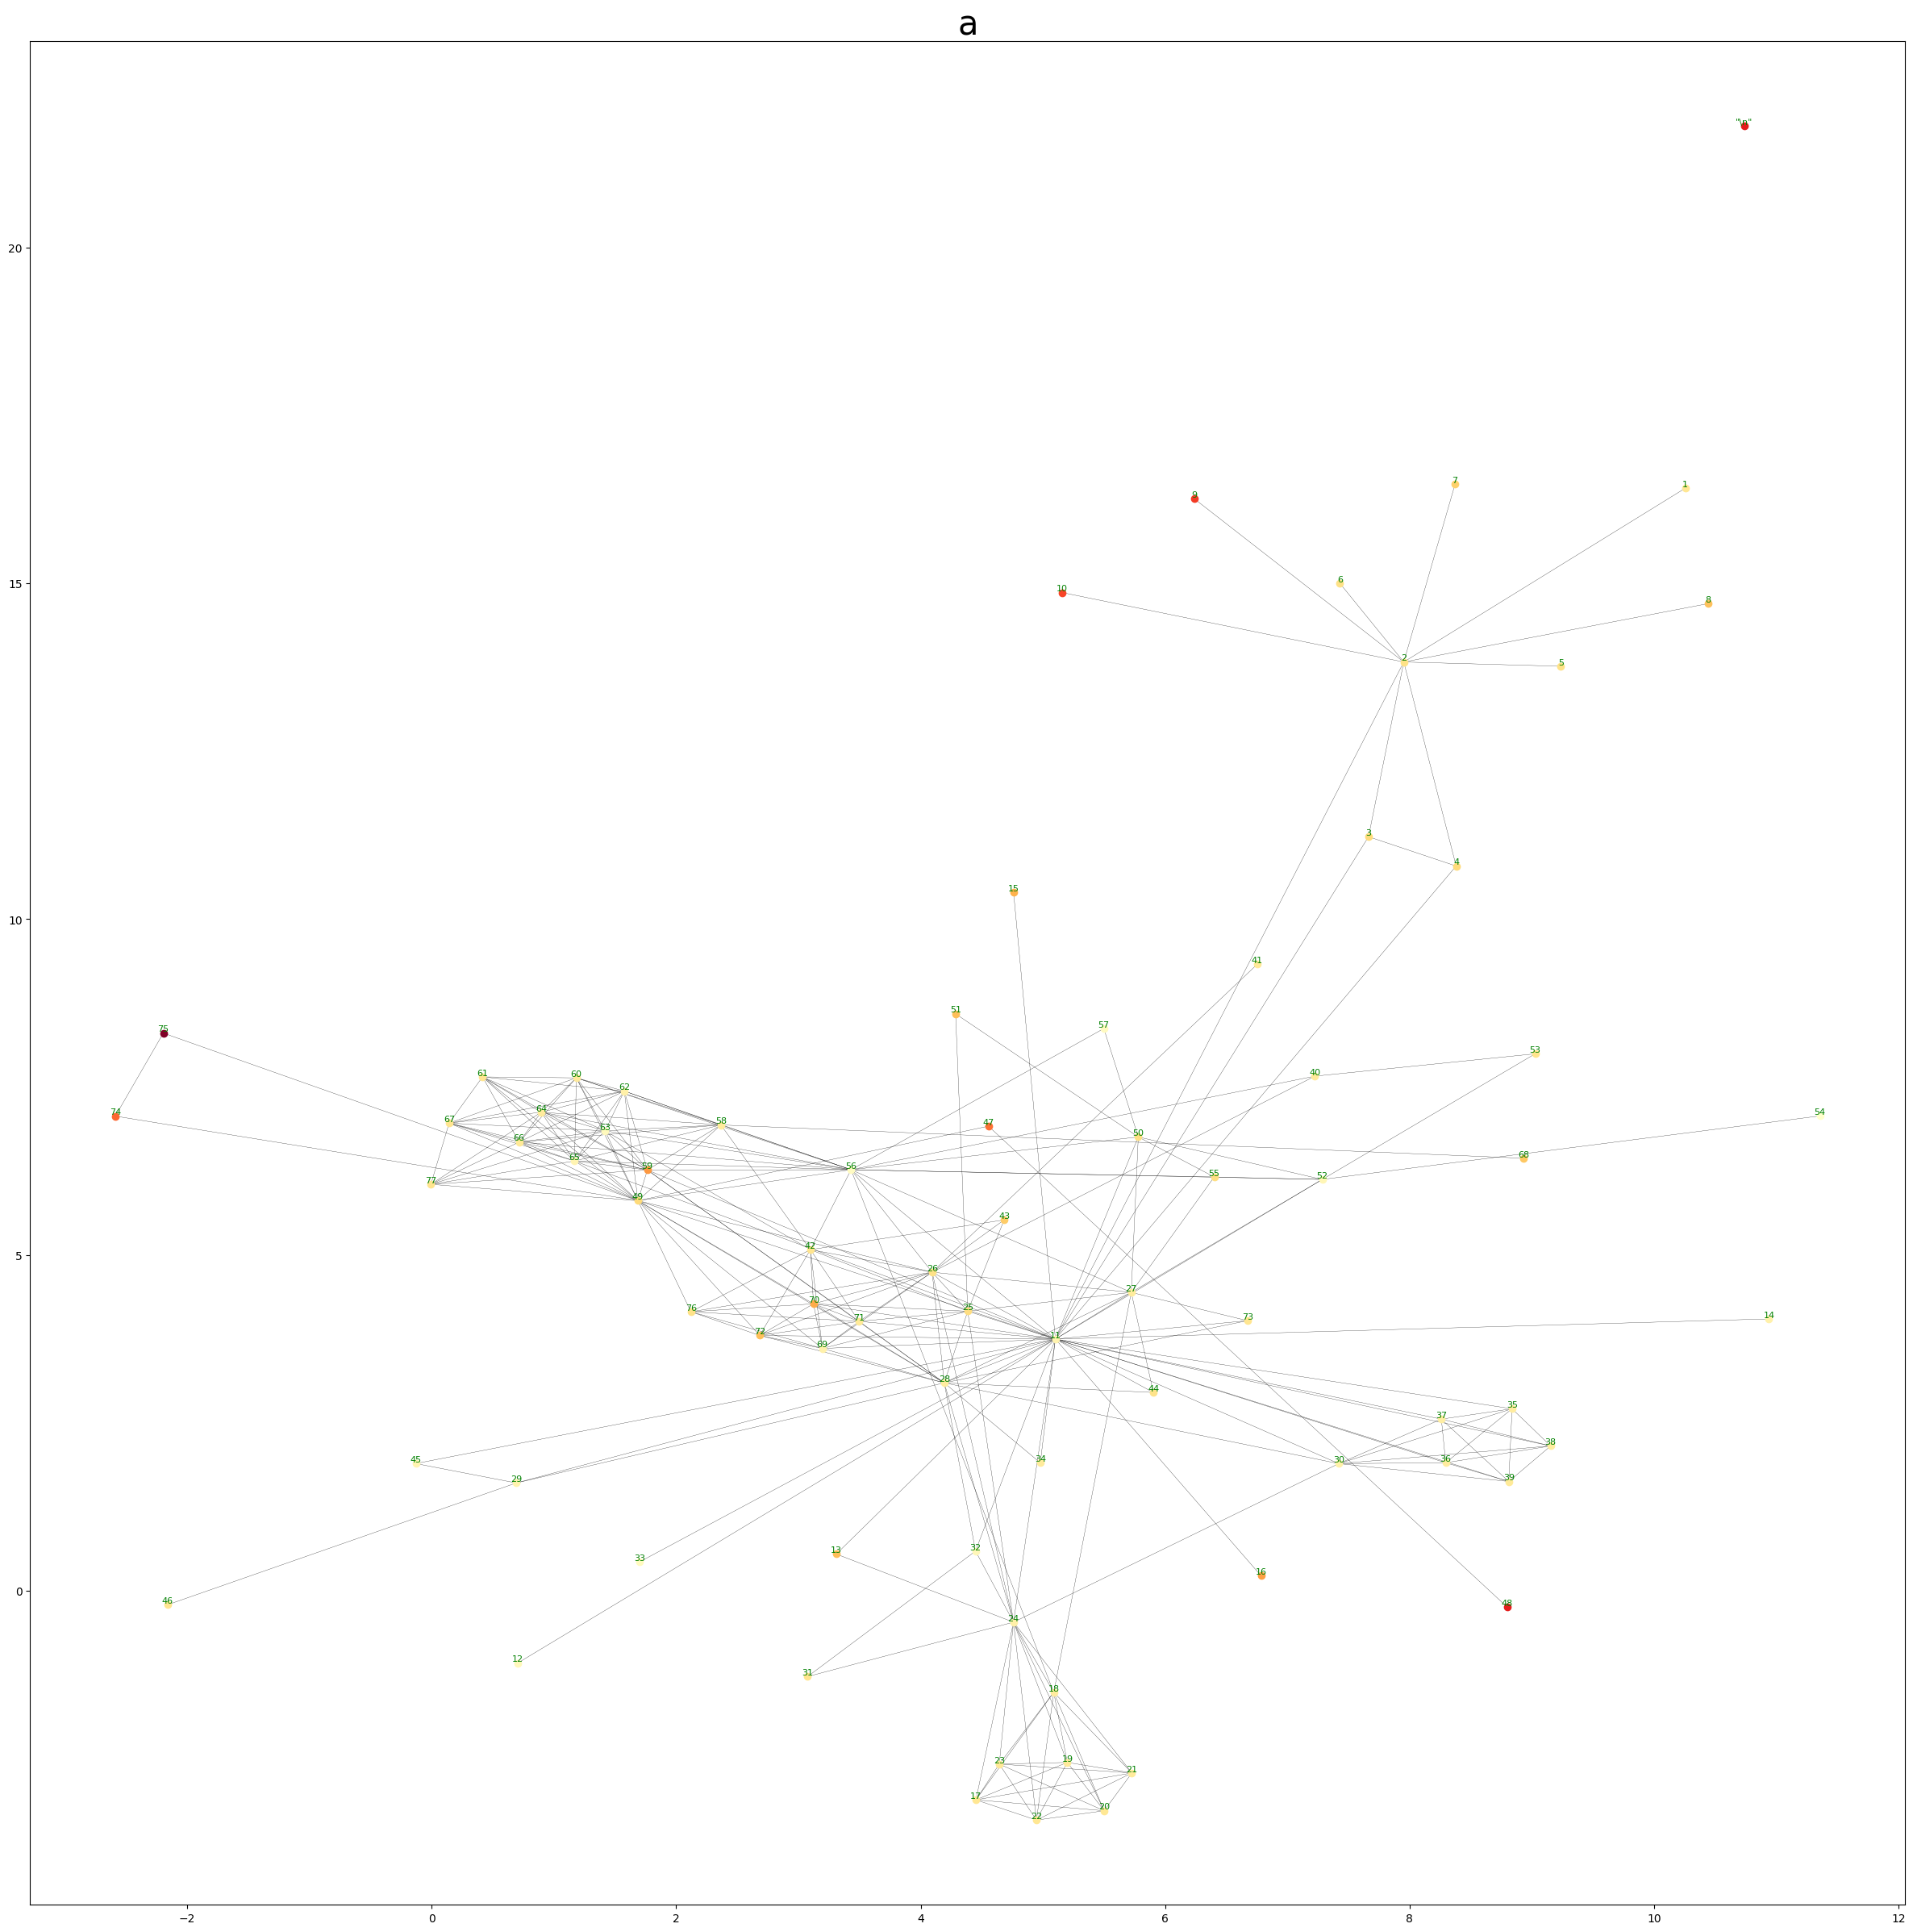

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(30,30))


create_forced_graph(axs,graph,1000)

188


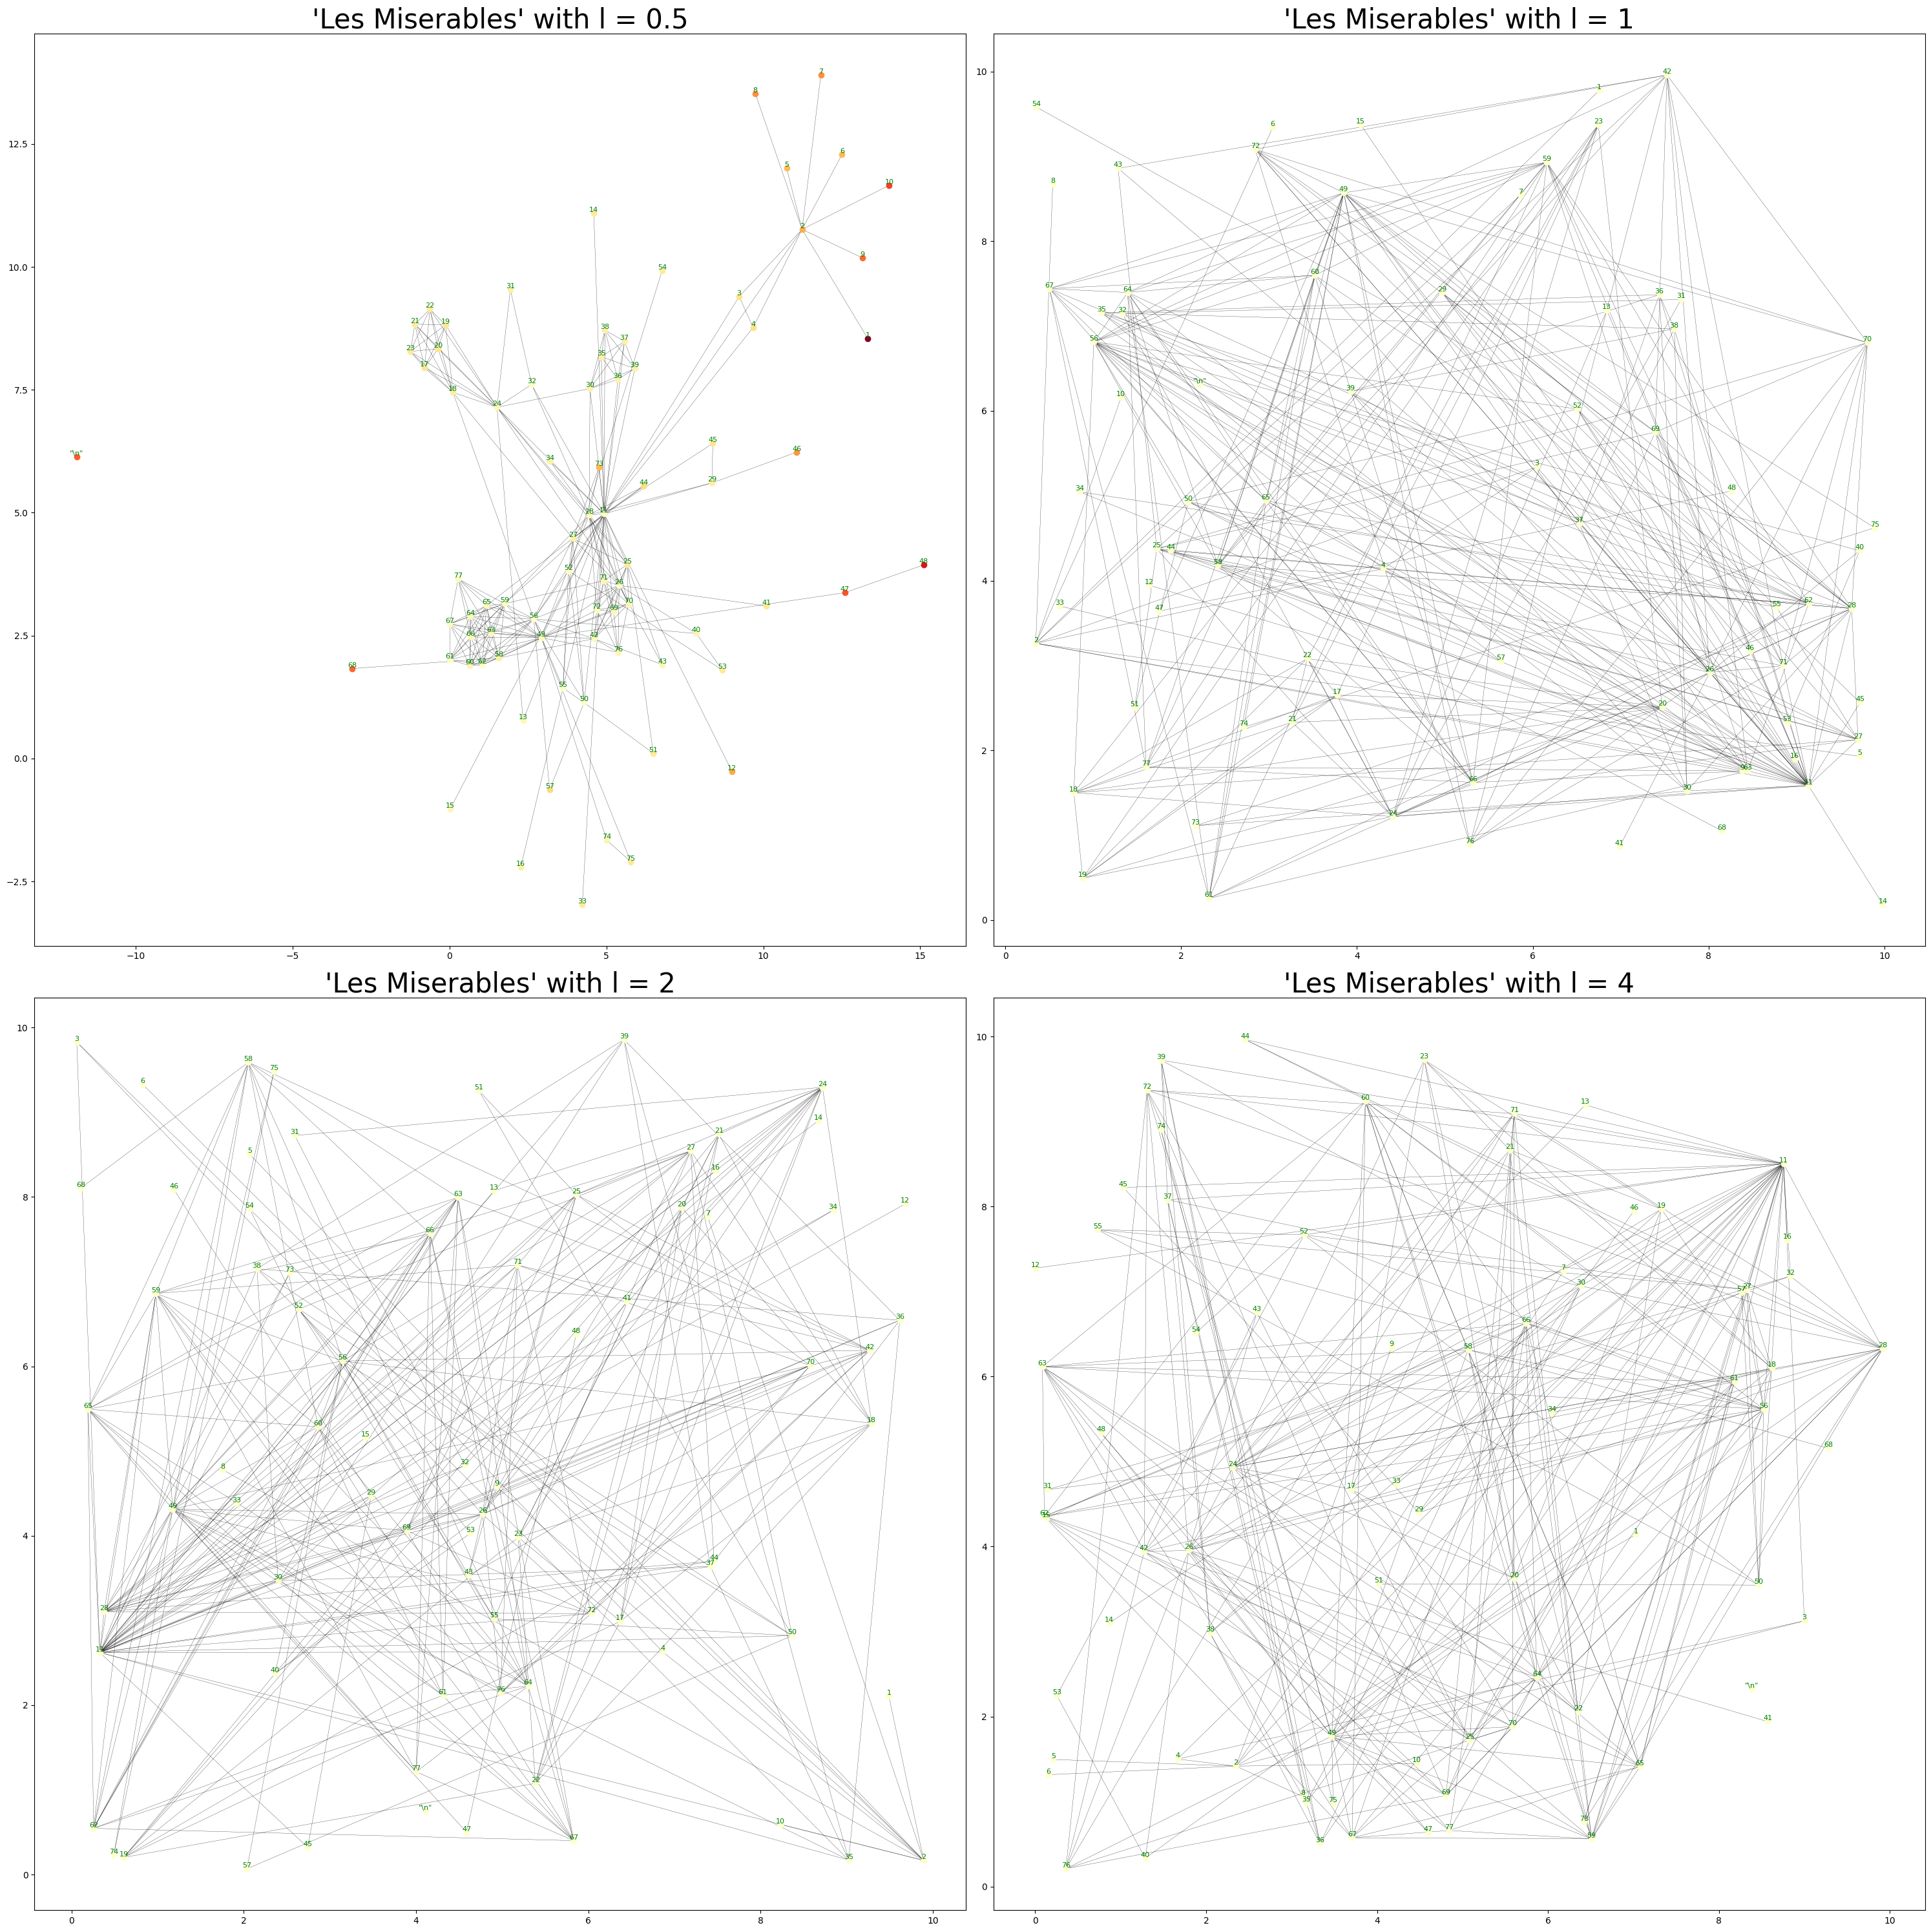

In [ ]:

fig,axs = plt.subplots(2,2,figsize=(30,30))
threshold = 0.05
learning_rate = 0.1

create_forced_graph(axs[0][0],graph,500,2,1,0.5,threshold,learning_rate,"'Les Miserables' with l = 0.5")
create_forced_graph(axs[0][1],graph,0,2,1,1,threshold,learning_rate,"'Les Miserables' with l = 1")
create_forced_graph(axs[1][0],graph,0,2,1,2,threshold,learning_rate,"'Les Miserables' with l = 2")
create_forced_graph(axs[1][1],graph,0,2,1,4,threshold,learning_rate,"'Les Miserables' with l = 4")
# les Miserables graph num itration = 427 (because of the threshold = 0.05 and the learning rate = 0.1 which decreaces over time.

plt.tight_layout()
plt.show()


# Step 5

In [ ]:
def separate_subgraphs(graph):
    subgraph_edges = {}
    subgraph_vertices = []
    inter_subgraph_edges = {}

    # Iterate through each cluster in the graph
    for i, subgraph in enumerate(graph.get_subgraphs()):
        subgraph_vertices.append(subgraph.get_node_list())
        subgraph_edges[i] = []

    # Initialize inter-cluster edges for each pair of clusters
    for i in range(len(subgraph_vertices)):
        for j in range(i + 1, len(subgraph_vertices)):
            inter_subgraph_edges[(i, j)] = []

    # Collect edges connecting vertices from different clusters
    for edge in graph.get_edge_list():
        source_vertex = edge.get_source()
        target_vertex = edge.get_destination()
        source_subgraph = None
        target_subgraph = None

        # Find which cluster each node belongs to
        for i, vertices in enumerate(subgraph_vertices):
             for vertex in vertices:
                if vertex.get_name() == source_vertex:
                    source_subgraph = i
                if vertex.get_name() == target_vertex:
                    target_subgraph = i

        # If the edge connects vertices from different clusters, add it to the inter-cluster edges
        if source_subgraph is not None and target_subgraph is not None:
            if source_subgraph != target_subgraph:
                inter_subgraph_edges[(min(source_subgraph, target_subgraph), max(source_subgraph, target_subgraph))].append(edge)
            else:
                subgraph_edges[source_subgraph].append(edge)

    return subgraph_vertices, subgraph_edges, inter_subgraph_edges


In [ ]:
def create_forced_subgraphs(ax,graph,boundry_box,num_iterations=1000,Cspring = 2.0, Crep=1.0, l=1.0,e=0.05,learning_rate=0.1,title = "a"):

    min_x, min_y = bounding_box['min_x'], bounding_box['min_y']
    width, height = bounding_box['width'], bounding_box['height']
    vertices = initialize_Forced_vertices(graph)
    for vertex in vertices.items():
        vertex[1].position = np.array([np.random.uniform(min_x,min_x + width), np.random.uniform(min_y,min_y+height)])  # Random initial position
    edges = graph.edges
    edge_set = {(edge.start.id, edge.end.id) for edge in edges}
    k = 0
    max_movement = 1
    while k < num_iterations and max_movement > e:
        compute_forces(vertices, edges,edge_set)
        max_movement = update_positions(vertices,learning_rate)
        k += 1
        if max_movement <= e:
            print(k)
    visualize_layout_subplots(ax,vertices, edges,boundry_box,title)
    return vertices


In [ ]:
def visualize_layout_subplots(ax,vertices, edges,box,title):
    # plt.figure(figsize=(20, 20))
    min_x, min_y = box['min_x'], box['min_y']
    width, height = box['width'], box['height']
    for vertex in vertices.values():
        vertex.position = (min(vertex.position[0], min_x + width - 2),min(vertex.position[1],min_y + height -2))
    norms = [np.linalg.norm(vertex.force) for vertex in vertices.values()]
    norm = Normalize(vmin=min(norms), vmax=max(norms))

    color = np.random.rand(3,)
    rect = plt.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='none', facecolor=color,alpha=0.25)
    ax.add_patch(rect)
    for edge in edges:
        source_pos = vertices[edge.start.id].position
        target_pos = vertices[edge.end.id].position
        ax.plot([source_pos[0], target_pos[0]], [source_pos[1], target_pos[1]], 'k-', linewidth=0.2)
    for vertex in vertices.values():
        color_rgba = plt.cm.YlOrRd(norm(np.linalg.norm(vertex.force)))
        color_hex = mcolors.rgb2hex(color_rgba[:3])
        ax.plot(vertex.position[0],vertex.position[1], 'o', color=color_hex)
        ax.text(vertex.position[0], vertex.position[1], str(vertex.id), fontsize=8, ha='center', va='bottom', color="green")
        ax.set_title(title, fontsize=30)

In [ ]:
def create_custom_graph_from_subgraph(vertices,edges): # O(V) + O(E) + O(V) + O(E) = O(2V + 2E) = O(V + E)
    # Parsing the vertices and edges from the generated graph into lists
    vertices = [n.get_name() for n in vertices] # O(V)
    edges = [(edge.get_source(),edge.get_destination(),edge.get_weight()) for edge in edges] # O(E)
    graph = Graph()
    for vertex in vertices: # O(V)
        vertex = Vertex(vertex, 0, 0)  # Initialize the vertex with ID and default coordinates
        graph.add_vertex(vertex)
    for edge in edges: # O(E)
        source_vertex = graph.get_vertex(edge[0])
        neighbor_vertex = graph.get_vertex(edge[1])
        if source_vertex is None:
            source_vertex = Vertex(edge[0], 0, 0)
        if neighbor_vertex is None:
            neighbor_vertex = Vertex(edge[1], 0, 0)
        source_vertex.add_neighbor(neighbor_vertex)
        graph.add_edge(Edge(source_vertex, neighbor_vertex))
    return graph

In [ ]:
def subdivide_edge(edges: np.ndarray, num_points: int) -> np.ndarray:
    segment_vecs = edges[:, 1:] - edges[:, :-1]
    segment_lens = np.linalg.norm(segment_vecs, axis=-1)
    cum_segment_lens = np.cumsum(segment_lens, axis=1)
    cum_segment_lens = np.hstack(
        [np.zeros((cum_segment_lens.shape[0], 1)), cum_segment_lens]
    )

    total_lens = cum_segment_lens[:, -1]

    # At which lengths do we want to generate new points
    t = np.linspace(0, 1, num=num_points, endpoint=True)
    desired_lens = t * total_lens[:, None]
    # Which segment should the new point be interpolated on
    i = np.argmax(desired_lens[:, None] < cum_segment_lens[..., None], axis=1)
    # At what percentage of the segment does this new point actually appear
    pct = (desired_lens - np.take_along_axis(cum_segment_lens, i - 1, axis=-1)) / (
        np.take_along_axis(segment_lens, i - 1, axis=-1) + 1e-8
    )

    row_indices = np.arange(edges.shape[0])[:, None]
    new_points = (
        (1 - pct[..., None]) * edges[row_indices, i - 1]
        + pct[..., None] * edges[row_indices, i]
    )

    return new_points
def compute_edge_compatibility(edges: np.ndarray) -> np.ndarray:

    vec = edges[:, -1] - edges[:, 0]
    vec_norm = np.linalg.norm(vec, axis=1, keepdims=True)
    epsilon = 1e-8

    # Angle compatibility
    cos_theta = np.einsum('ik,jk->ij', vec, vec) / (vec_norm @ vec_norm.T + epsilon)
    compat_angle = np.abs(cos_theta)

    # Length compatibility
    l_avg = (vec_norm + vec_norm.T) / 2
    min_norm = np.minimum(vec_norm, vec_norm.T)
    max_norm = np.maximum(vec_norm, vec_norm.T)
    compat_length = 2 / (l_avg / (min_norm + epsilon) + max_norm / (l_avg + epsilon) + epsilon)

    # Distance compatibility
    midpoint = (edges[:, 0] + edges[:, -1]) / 2
    midpoint_dist = np.linalg.norm(midpoint[None, :] - midpoint[:, None], axis=-1)
    compat_dist = l_avg / (l_avg + midpoint_dist + epsilon)

    # Calculate projection vector
    ap = edges[None, ...] - edges[:, None, None, 0]
    t = np.sum(ap * vec[:, None, None, :], axis=-1) / (np.sum(vec**2, axis=-1)[:, None, None] + epsilon)
    I = edges[:, None, 0, None] + t[..., None] * vec[:, None, None, :]

    # Calculate midpoints and distances
    Im = (I[..., 0, :] + I[..., 1, :]) / 2
    midpoint = (edges[:, 0] + edges[:, -1]) / 2
    denom = np.sqrt(np.sum((I[..., 0, :] - I[..., 1, :]) ** 2, axis=-1))
    num = 2 * np.linalg.norm(midpoint[:, None, ...] - Im, axis=-1)

    # Compute visibility compatibility
    compat_visibility = np.maximum(0, 1 - num / (denom + epsilon))
    compat_visibility = np.minimum(compat_visibility, compat_visibility.T)

    # Combine compatibility scores
    return compat_angle * compat_length * compat_dist * compat_visibility

def compute_forces_new(e: np.ndarray, e_compat: np.ndarray, kp: np.ndarray) -> np.ndarray:
    # Left-mid spring direction
    v_spring_l = e[:, :-1] - e[:, 1:]
    v_spring_l = np.concatenate(
        [np.zeros((v_spring_l.shape[0], 1, v_spring_l.shape[-1])), v_spring_l],
        axis=1,
    )

    # Right-mid spring direction
    v_spring_r = e[:, 1:] - e[:, :-1]
    v_spring_r = np.concatenate(
        [v_spring_r, np.zeros((v_spring_l.shape[0], 1, v_spring_l.shape[-1]))],
        axis=1,
    )

    f_spring_l = np.sum(v_spring_l**2, axis=-1, keepdims=True)
    f_spring_r = np.sum(v_spring_r**2, axis=-1, keepdims=True)

    F_spring = kp * (f_spring_l * v_spring_l + f_spring_r * v_spring_r)

    # Electrostatic force
    v_electro = e[:, None, ...] - e[None, ...]
    f_electro = e_compat[..., None] / (np.linalg.norm(v_electro, axis=-1) + 1e-8)

    F_electro = np.sum(f_electro[..., None] * v_electro, axis=0)

    F = F_spring + F_electro
    # The first and last points are fixed
    F[:, 0, :] = F[:, -1, :] = 0

    return F


def bundling_edges(edges,K = 0.1,n_iter = 60,n_iter_reduction = 2 / 3,lr = 0.04,lr_reduction = 0.5,
                   n_cycles = 6,initial_segpoints = 1,segpoint_increase = 2,compat_threshold = 0.5):
    initial_edge_vecs = edges[:, 0] - edges[:, -1]
    initial_edge_lengths = np.linalg.norm(initial_edge_vecs, axis=-1, keepdims=True)

    # Compute edge compatibilities
    edge_compatibilities = compute_edge_compatibility(edges)
    edge_compatibilities = (edge_compatibilities > compat_threshold).astype(np.float32)

    num_segments = initial_segpoints

    for cycle in range(n_cycles):
        edges = subdivide_edge(edges, num_segments + 2)  # Add 2 for endpoints
        num_segments = int(np.ceil(num_segments * segpoint_increase))

        kp = K / (initial_edge_lengths * num_segments + 1e-8)
        kp = kp[..., None]

        for epoch in range(n_iter):
            F = compute_forces_new(edges, edge_compatibilities, kp)
            edges += F * lr

        n_iter = int(np.ceil(n_iter * n_iter_reduction))
        lr = lr * lr_reduction

    return edges

In [ ]:
def compact_edges(cur_edges,subGraph1, subGraph2):
    e = []
    for edge in cur_edges:
        if edge.get_source() in subGraph1:
            start = np.array(subGraph1[edge.get_source()].position)
            end = np.array(subGraph2[edge.get_destination()].position)
        else:
            start = np.array(subGraph2[edge.get_source()].position)
            end = np.array(subGraph1[edge.get_destination()].position)
        e.append((start, end))
    return np.array(e)

161
103


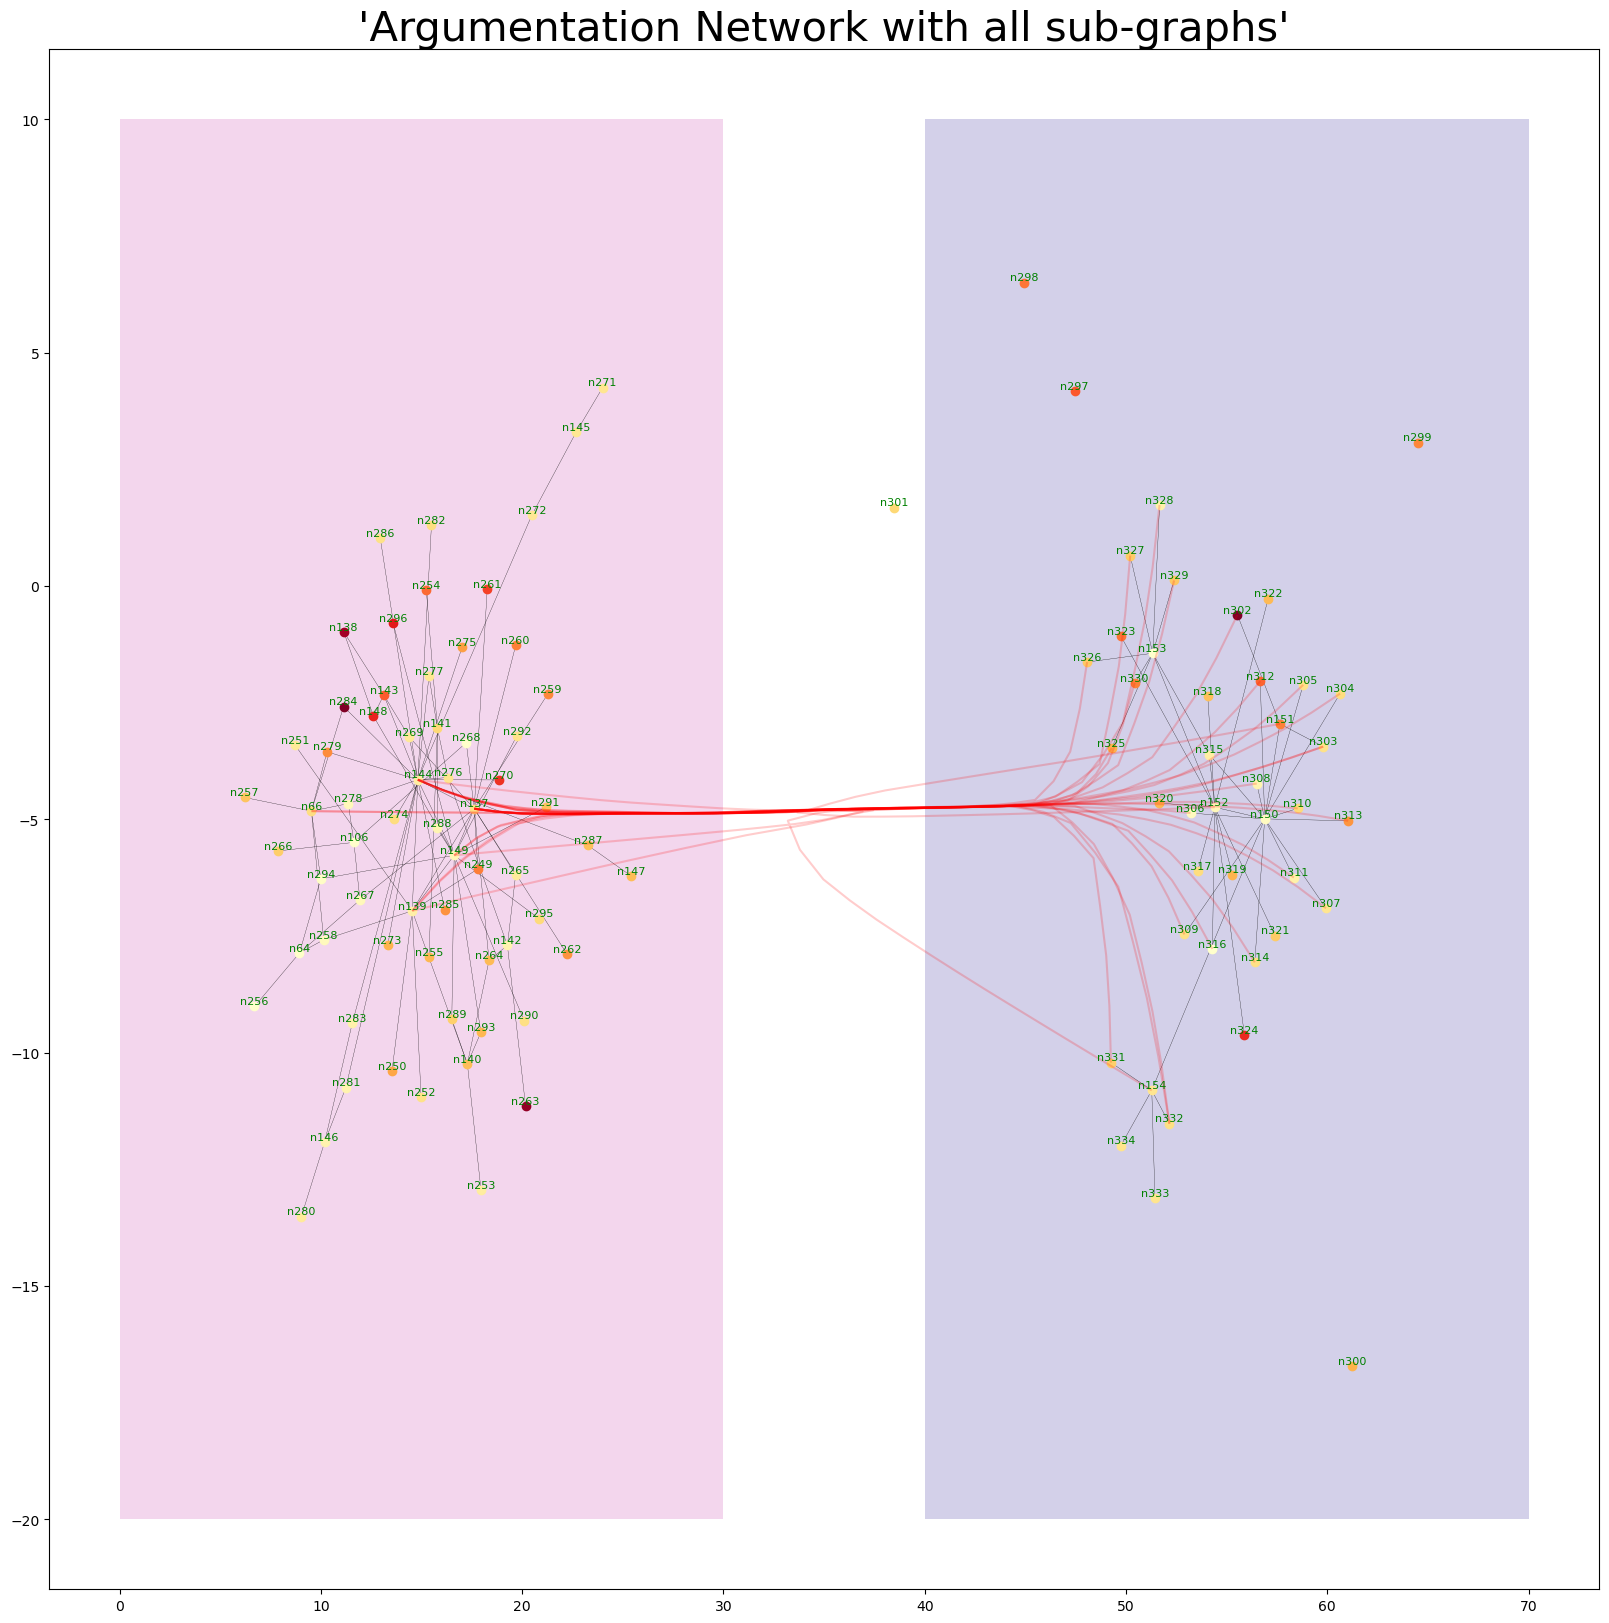

In [ ]:
G=pydot.graph_from_dot_file(url_Argumentation_network_for_part_five)[0]
subgraph_vertices, subgraph_edges, inter_subgraph_edges = separate_subgraphs(G)
fig,axs = plt.subplots(1,1,figsize=(20,20))
threshold = 0.05
learning_rate = 0.1
current_position =(0, -20)
padding=10
graph_list = []
for i in range(len(subgraph_vertices)):
    width = height = min(len(subgraph_vertices[i]),30)
    min_x, min_y = current_position
    max_x = min_x + width
    max_y = min_y + height
    bounding_box = {
            'min_x': min_x,
            'min_y': min_y,
            'width': width,
            'height': height
        }
    graph = create_custom_graph_from_subgraph(subgraph_vertices[i],subgraph_edges[i])
    graph_list.append(create_forced_subgraphs(axs,graph,bounding_box,1000,2,1,0.5,0.05,0.1,"'Argumentation Network with all sub-graphs'"))
    current_position = (max_x + padding, min_y)
for index,cur_edges in inter_subgraph_edges.items():
    if len(cur_edges) == 0:
        continue
    subGraph1 = graph_list[index[0]]
    subGraph2 = graph_list[index[1]]
    edges = compact_edges(cur_edges,subGraph1, subGraph2)
    bundled_inter_cluster_edges = bundling_edges(edges)
    start = None
    end = None
    collection = collections.LineCollection(bundled_inter_cluster_edges, color="r", alpha=0.2)
    axs.add_collection(collection)



